In [1]:
#Load and explore the dataset
import pandas as pd

# Define the file path
file_path = r"D:\PowerPulse\household_power_consumption.txt"

# Load the dataset
df = pd.read_csv(
    file_path, 
    sep=';', 
    low_memory=False, 
    na_values='?', 
    parse_dates=[[0, 1]],  # Combine Date and Time into one column
    infer_datetime_format=True
)

# Rename the combined column
df.rename(columns={'Date_Time': 'DateTime'}, inplace=True)

# Set datetime as index (optional for time series)
df.set_index('DateTime', inplace=True)

# Preview the data
df.head()

C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_11864\3142236134.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_11864\3142236134.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_11864\3142236134.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [2]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check column names and data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Preview the first few rows
df.head()


Shape of the dataset: (2075259, 7)

Data types:
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Summary statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count   

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
# Total rows with any missing value
missing_rows = df.isnull().any(axis=1).sum()
print(f"Total rows with at least one missing value: {missing_rows}")


Total rows with at least one missing value: 25979


In [4]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Confirm shape after dropping
print("Shape after dropping missing values:", df.shape)

# Verify no missing values remain
print("Total missing values:", df.isna().sum().sum())

Shape after dropping missing values: (2049280, 7)
Total missing values: 0


In [4]:
print(df.head())

                     Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

need to check from here



In [5]:
# Check the first and last timestamp
print("Date Range:")
print("Start:", df.index.min())
print("End:", df.index.max())

# Check frequency of the datetime index
print("\nFrequency check (first few time differences):")
print(df.index.to_series().diff().value_counts().head())


Date Range:
Start: 2006-12-16 17:24:00
End: 2010-11-26 21:02:00

Frequency check (first few time differences):
DateTime
0 days 00:01:00    2049208
0 days 00:02:00         38
0 days 00:03:00         14
0 days 00:04:00          2
2 days 14:04:00          1
Name: count, dtype: int64


working with time series data, resampling can be a useful technique for several reasons


In [9]:
# Resample to daily frequency using mean
df_daily = df.resample('D').mean()

# Preview the result
print("Shape of daily-resampled data:", df_daily.shape)
df_daily.head()

Shape of daily-resampled data: (1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


In [10]:
# Check for any remaining missing values
print("Missing values in daily data:")
print(df_daily.isna().sum())

Missing values in daily data:
Global_active_power      9
Global_reactive_power    9
Voltage                  9
Global_intensity         9
Sub_metering_1           9
Sub_metering_2           9
Sub_metering_3           9
dtype: int64


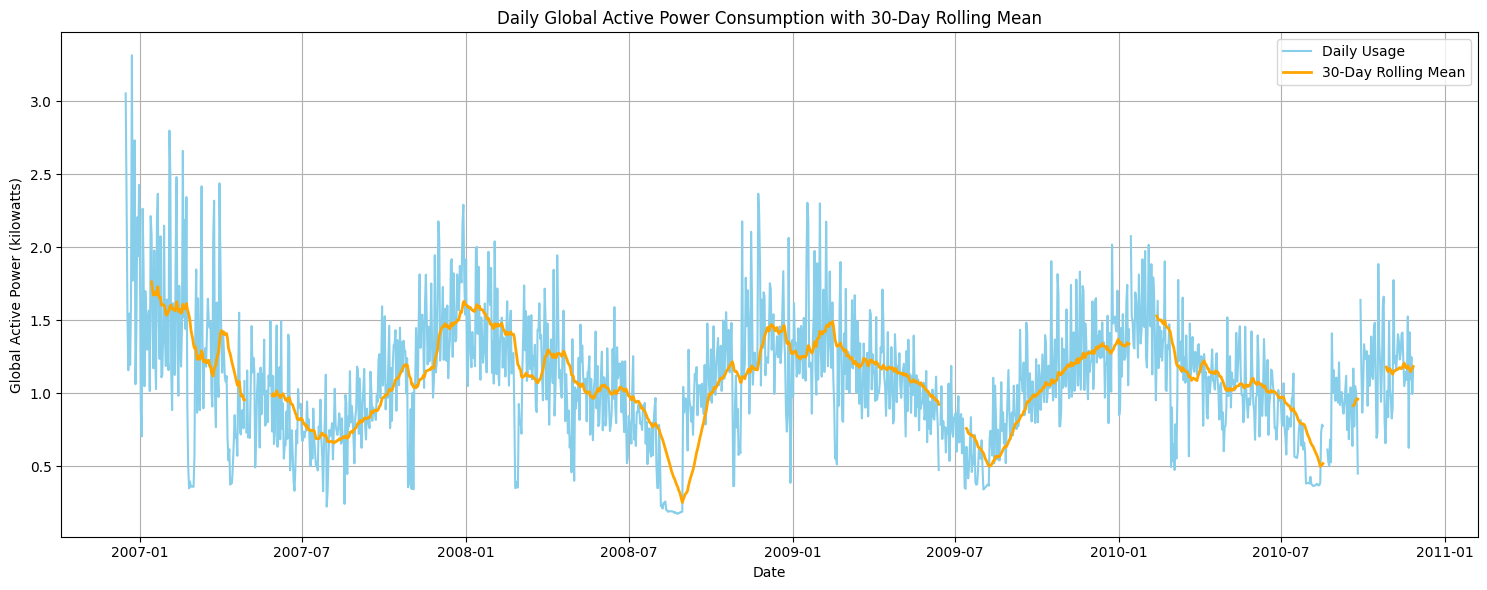

In [11]:
#Plot Daily Global Active Power + Rolling Mean
import matplotlib.pyplot as plt

# Plot daily global active power
plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['Global_active_power'], label='Daily Usage', color='skyblue')

# Add 30-day rolling average
rolling_mean = df_daily['Global_active_power'].rolling(window=30).mean()
plt.plot(df_daily.index, rolling_mean, label='30-Day Rolling Mean', color='orange', linewidth=2)

# Add labels and legend
plt.title('Daily Global Active Power Consumption with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


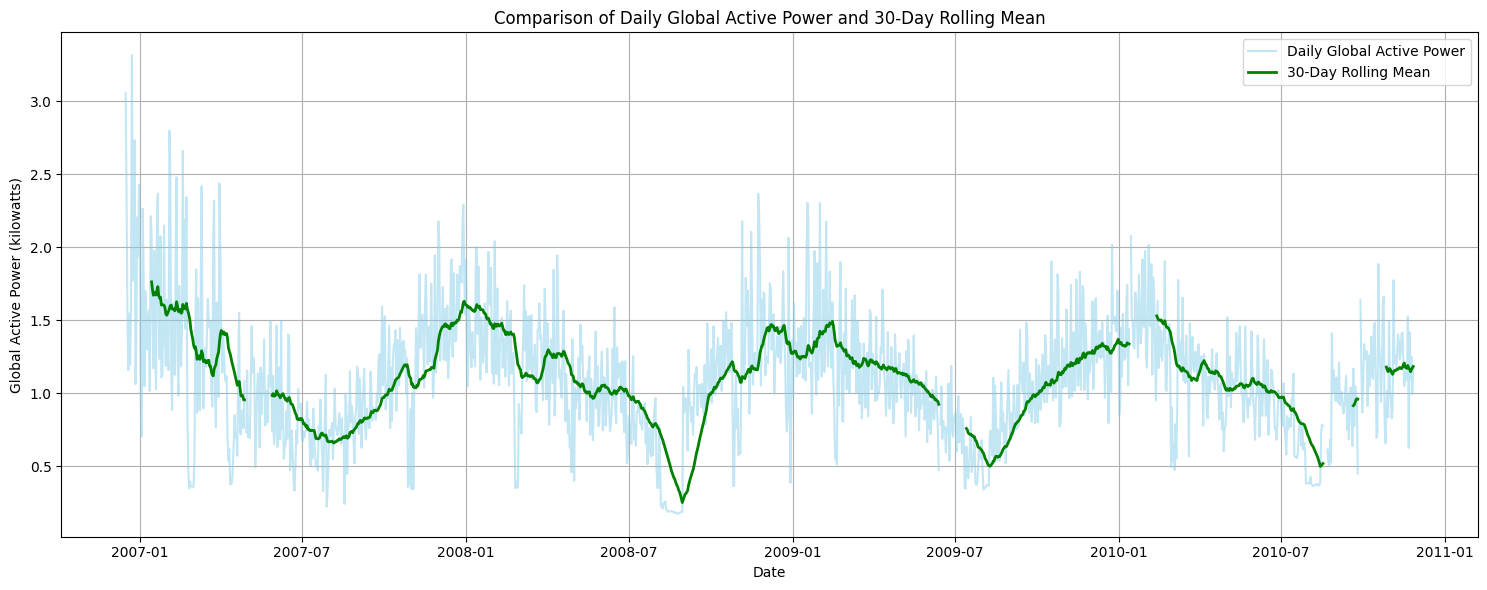

In [13]:
# Plot original data and rolling mean together
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(df_daily.index, df_daily['Global_active_power'], label='Daily Global Active Power', color='skyblue', alpha=0.5)
plt.plot(df_daily.index, rolling_mean, label='30-Day Rolling Mean', color='green', linewidth=2)

# Add labels and title
plt.title('Comparison of Daily Global Active Power and 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

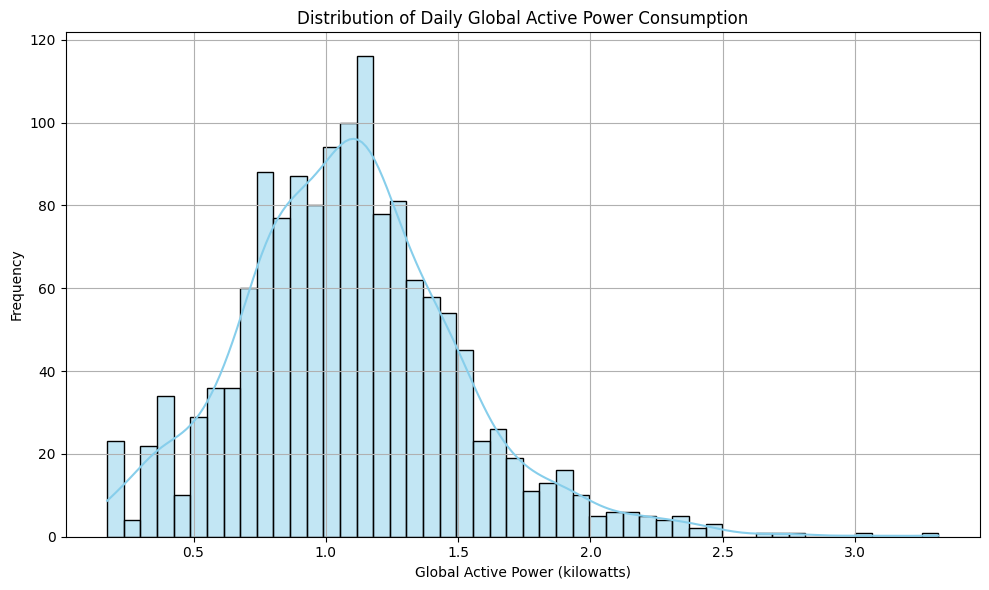

In [14]:
#Distribution of Global Active Power
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot histogram and KDE for 'Global_active_power'
sns.histplot(df_daily['Global_active_power'], kde=True, color='skyblue', bins=50)

# Add labels and title
plt.title('Distribution of Daily Global Active Power Consumption')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


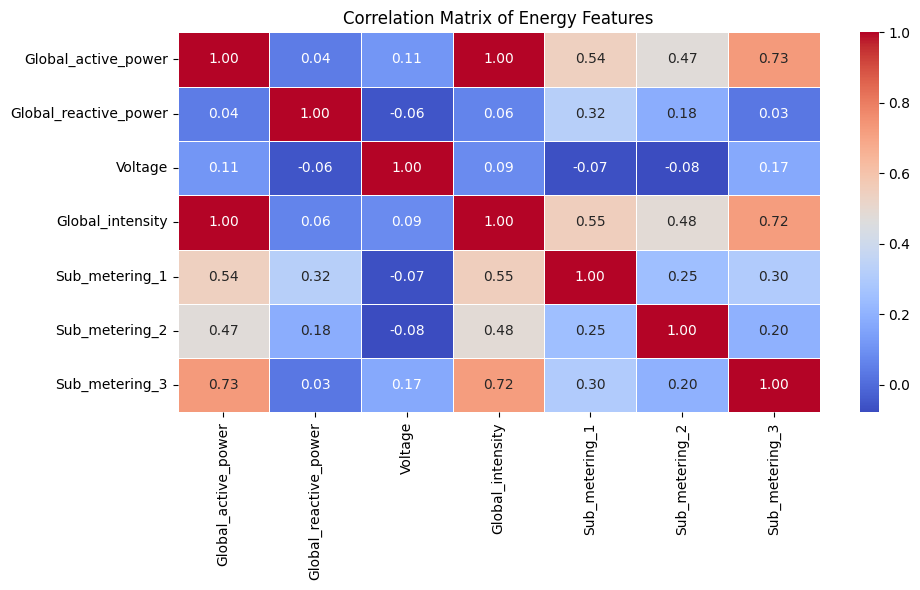

In [10]:
# Compute the correlation matrix
correlation_matrix = df_daily.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Energy Features")
plt.tight_layout()
plt.show()


C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_18972\921638588.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_18972\921638588.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_18972\921638588.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


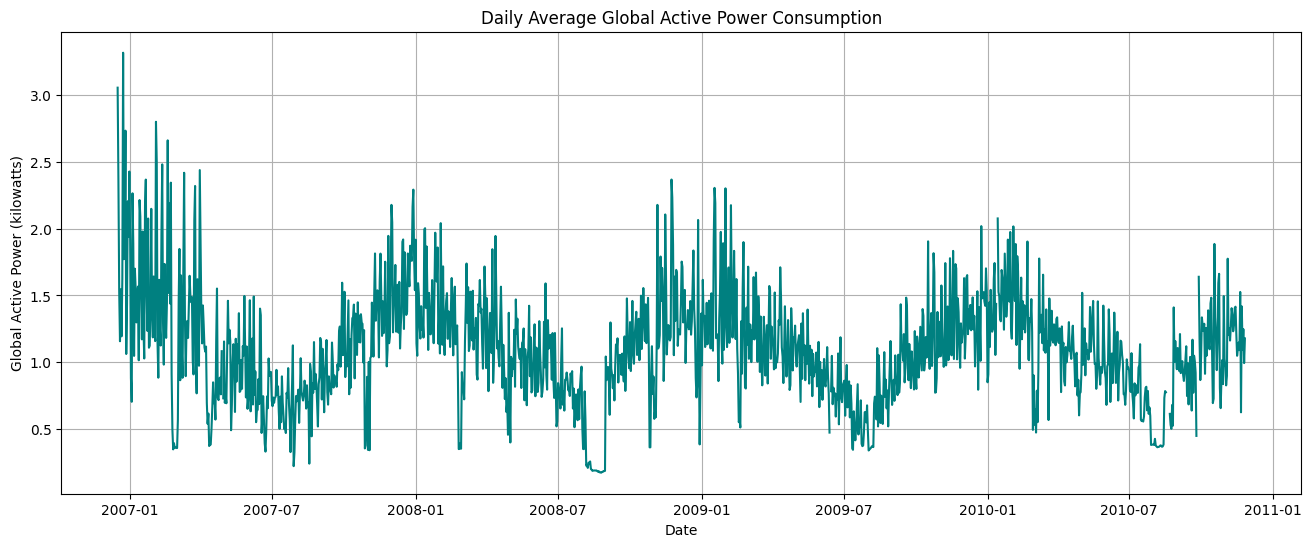

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data directly from the .txt file
df = pd.read_csv(
    'D:/PowerPulse/household_power_consumption.txt',
    sep=';',
    low_memory=False,
    na_values='?',
    parse_dates=[[0, 1]],
    infer_datetime_format=True
)

# Rename the combined column
df.rename(columns={'Date_Time': 'DateTime'}, inplace=True)
df.set_index('DateTime', inplace=True)

# Drop missing values (if not already done)
df.dropna(inplace=True)

# Resample to daily average
daily_data = df.resample('D').mean()

# Plot daily Global Active Power consumption
plt.figure(figsize=(16, 6))
plt.plot(daily_data.index, daily_data['Global_active_power'], color='teal')
plt.title('Daily Average Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


In [14]:
# Save the cleaned DataFrame to CSV
df.to_csv('D:/PowerPulse/cleaned_household_power_consumption.csv')

print("✅ Cleaned data saved successfully at D:/PowerPulse/cleaned_household_power_consumption.csv!")


✅ Cleaned data saved successfully at D:/PowerPulse/cleaned_household_power_consumption.csv!


C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_21712\3295040746.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


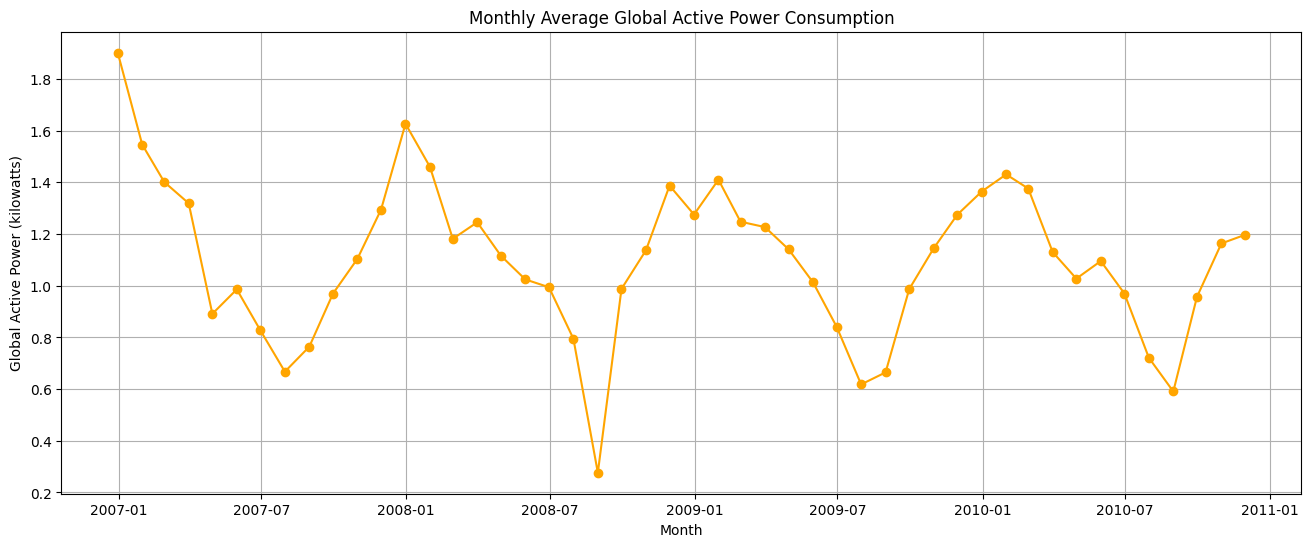

In [5]:
import matplotlib.pyplot as plt

# First resample to monthly average
monthly_data = df.resample('M').mean()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(monthly_data.index, monthly_data['Global_active_power'], marker='o', linestyle='-', color='orange')
plt.title('Monthly Average Global Active Power Consumption')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_21712\474677690.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df.resample('Y').mean()


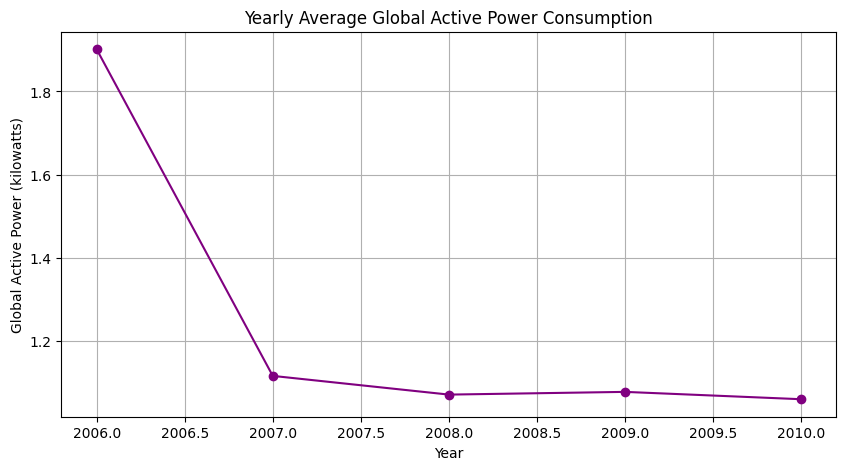

In [6]:
# Resample to yearly average
yearly_data = df.resample('Y').mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_data.index.year, yearly_data['Global_active_power'], marker='o', linestyle='-', color='purple')
plt.title('Yearly Average Global Active Power Consumption')
plt.xlabel('Year')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


In [8]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl (40.9 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


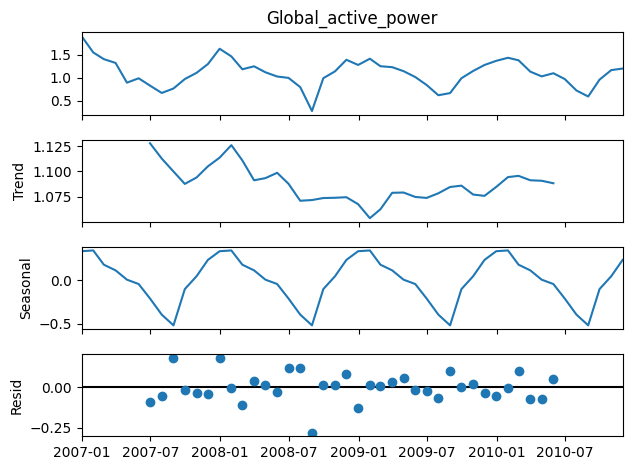

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose monthly data
result = seasonal_decompose(monthly_data['Global_active_power'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Step 1: Load the cleaned CSV (assuming you've already saved it earlier)
df = pd.read_csv('D:/PowerPulse/cleaned_household_power_consumption.csv', parse_dates=['DateTime'], index_col='DateTime')

# Step 2: Resample to monthly average
monthly_data = df.resample('M').mean()

monthly_data.head()


C:\Users\Bharanidharan\AppData\Local\Temp\ipykernel_13328\4163984871.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-31,1.901295,0.131386,241.441125,8.029956,1.248636,2.214987,7.409558
2007-01-31,1.546034,0.132676,240.905101,6.546915,1.264237,1.775931,7.383351
2007-02-28,1.401084,0.113637,240.519390,5.914569,1.180217,1.602361,6.703557
2007-03-31,1.318627,0.114747,240.513469,5.572979,1.361343,2.346872,6.504648
2007-04-30,0.891189,0.118778,239.400026,3.825676,1.065886,0.973149,4.800339


In [3]:
from statsmodels.tsa.stattools import adfuller

# Step 3: ADF Test
result = adfuller(monthly_data['Global_active_power'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("✅ Data is stationary. Proceed to modeling.")
else:
    print("❌ Data is non-stationary. Differencing is required.")


ADF Statistic: -4.897270331927375
p-value: 3.530354247769903e-05
✅ Data is stationary. Proceed to modeling.


In [15]:
# Assume your cleaned DataFrame is called 'df'
# And 'DateTime' column is already parsed properly

import pandas as pd

# 1. Create 'daily_avg_power' ➔ Average Global Active Power per day
df['daily_avg_power'] = df['Global_active_power'].resample('D').transform('mean')

# 2. Create 'rolling_mean_7d' ➔ 7-day rolling average
df['rolling_mean_7d'] = df['Global_active_power'].rolling(window=7, min_periods=1).mean()

# 3. Create 'rolling_std_7d' ➔ 7-day rolling standard deviation
df['rolling_std_7d'] = df['Global_active_power'].rolling(window=7, min_periods=1).std()

# 4. Extract 'hour' ➔ useful for peak hour analysis
df['hour'] = df.index.hour

# 5. Extract 'day_of_week' ➔ Monday=0, Sunday=6
df['day_of_week'] = df.index.dayofweek

# 6. Create 'is_weekend' ➔ 1 if Saturday(5) or Sunday(6), else 0
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# 7. Extract 'month' ➔ Seasonal trend
df['month'] = df.index.month

print("✅ Feature engineering completed!")
print(df.head())


✅ Feature engineering completed!
                     Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0

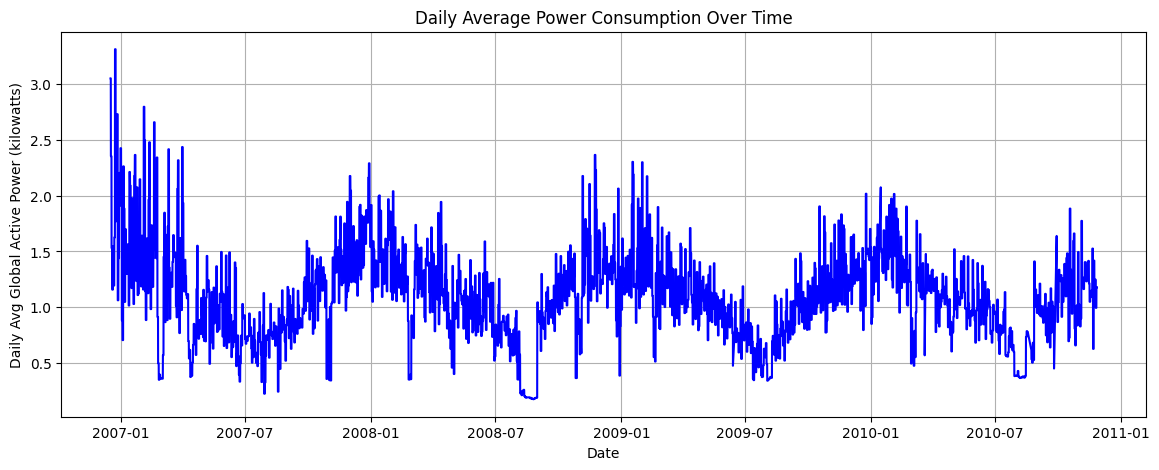

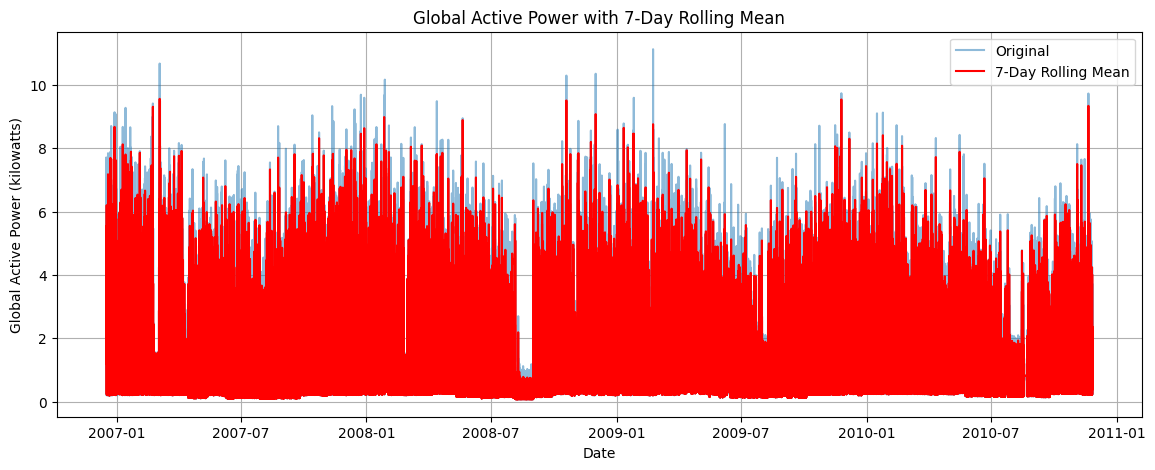

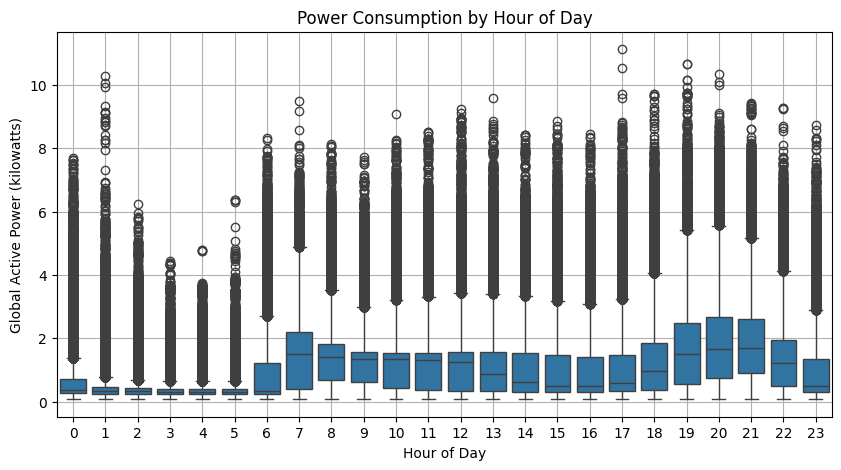

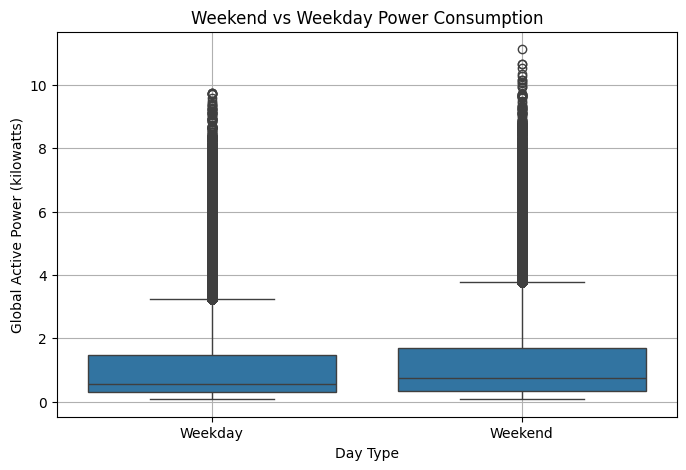

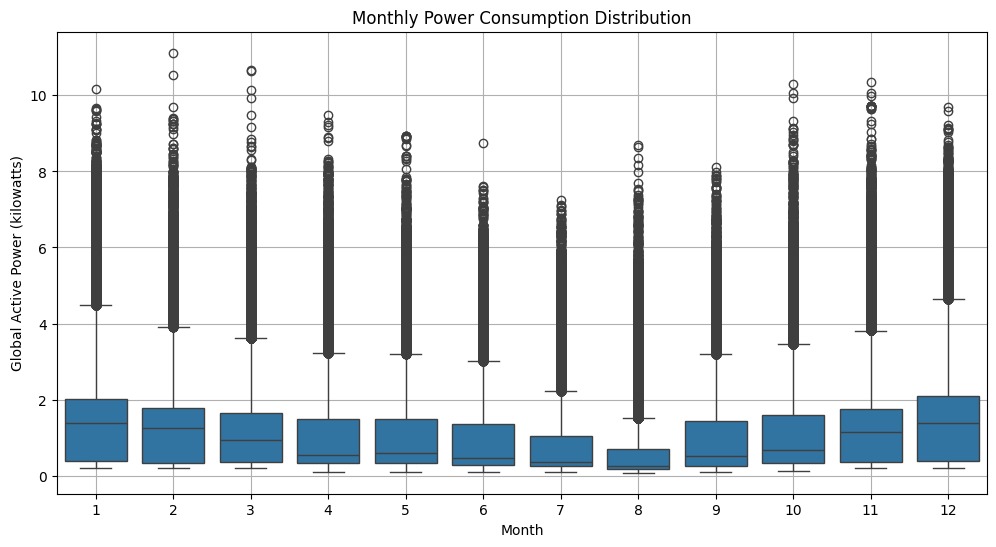

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daily Average Power over time
plt.figure(figsize=(14,5))
plt.plot(df.index, df['daily_avg_power'], color='blue')
plt.title('Daily Average Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Avg Global Active Power (kilowatts)')
plt.grid()
plt.show()

# 2. 7-Day Rolling Mean vs Original Power
plt.figure(figsize=(14,5))
plt.plot(df.index, df['Global_active_power'], label='Original', alpha=0.5)
plt.plot(df.index, df['rolling_mean_7d'], label='7-Day Rolling Mean', color='red')
plt.title('Global Active Power with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid()
plt.show()

# 3. Power Consumption by Hour of Day (Peak Hours)
plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='Global_active_power', data=df)
plt.title('Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()
plt.show()

# 4. Power Consumption: Weekend vs Weekday
plt.figure(figsize=(8,5))
sns.boxplot(x='is_weekend', y='Global_active_power', data=df)
plt.title('Weekend vs Weekday Power Consumption')
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.xlabel('Day Type')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()
plt.show()

# 5. Power Consumption by Month
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='Global_active_power', data=df)
plt.title('Monthly Power Consumption Distribution')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid()
plt.show()


In [18]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 7.7 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 6.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 6.2 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 5.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 4.8 MB/s eta 0:00:00


RMSE: 0.3320
MAE: 0.1474
R² Score: 0.9019


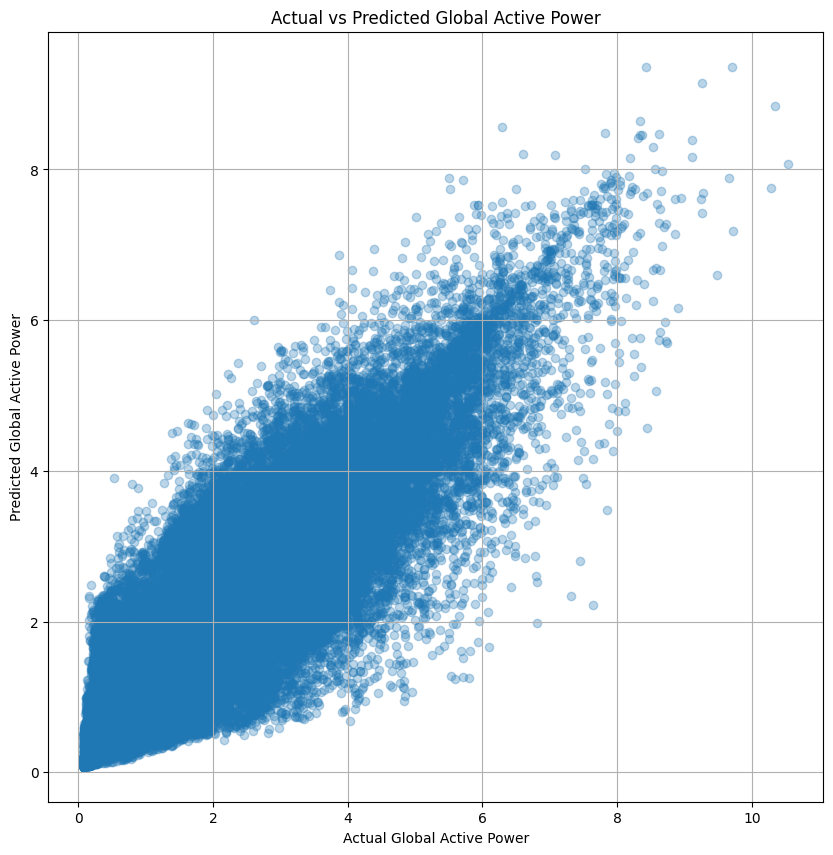

In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load Cleaned Data
df = pd.read_csv('D:/PowerPulse/cleaned_household_power_consumption.csv', parse_dates=['DateTime'], index_col='DateTime')

# 3. Feature Engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df.index.month

# Daily average power
daily_avg = df['Global_active_power'].resample('D').mean()
df = df.merge(daily_avg.rename('daily_avg_power'), left_on=df.index.date, right_on=daily_avg.index.date, how='left')
df = df.set_index('key_0')  # Reset index after merge
df.index = pd.to_datetime(df.index)

# Rolling mean over 7 days
df['rolling_mean_7d'] = df['Global_active_power'].rolling(window=7, min_periods=1).mean()

# 4. Feature Selection
features = ['daily_avg_power', 'hour', 'day_of_week', 'is_weekend', 'month', 'rolling_mean_7d']
target = 'Global_active_power'

X = df[features]
y = df[target]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 8. Predictions
y_pred = model.predict(X_test_scaled)

# 9. Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 10. Quick Plot (Actual vs Predicted)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted Global Active Power')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load Cleaned Data
df = pd.read_csv('D:/PowerPulse/cleaned_household_power_consumption.csv', parse_dates=['DateTime'], index_col='DateTime')

# Feature Engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df.index.month

# Daily average power
daily_avg = df['Global_active_power'].resample('D').mean()
df = df.merge(daily_avg.rename('daily_avg_power'), left_on=df.index.date, right_on=daily_avg.index.date, how='left')
df = df.set_index('key_0')  # Reset index after merge
df.index = pd.to_datetime(df.index)

# Rolling mean over 7 days
df['rolling_mean_7d'] = df['Global_active_power'].rolling(window=7, min_periods=1).mean()

# Feature Selection
features = ['daily_avg_power', 'hour', 'day_of_week', 'is_weekend', 'month', 'rolling_mean_7d']
target = 'Global_active_power'

X = df[features]
y = df[target]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.1716
RMSE: 0.3617
R² Score: 0.8836


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Load Cleaned Data
df = pd.read_csv('D:/PowerPulse/cleaned_household_power_consumption.csv', parse_dates=['DateTime'], index_col='DateTime')

# Feature Engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df.index.month

# Daily average power
daily_avg = df['Global_active_power'].resample('D').mean()
df = df.merge(daily_avg.rename('daily_avg_power'), left_on=df.index.date, right_on=daily_avg.index.date, how='left')
df = df.set_index('key_0')  # Reset index after merge
df.index = pd.to_datetime(df.index)

# Rolling mean over 7 days
df['rolling_mean_7d'] = df['Global_active_power'].rolling(window=7, min_periods=1).mean()

# Feature Selection
features = ['daily_avg_power', 'hour', 'day_of_week', 'is_weekend', 'month', 'rolling_mean_7d']
target = 'Global_active_power'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")




MAE: 0.3381
RMSE: 0.4933
R² Score: 0.7835


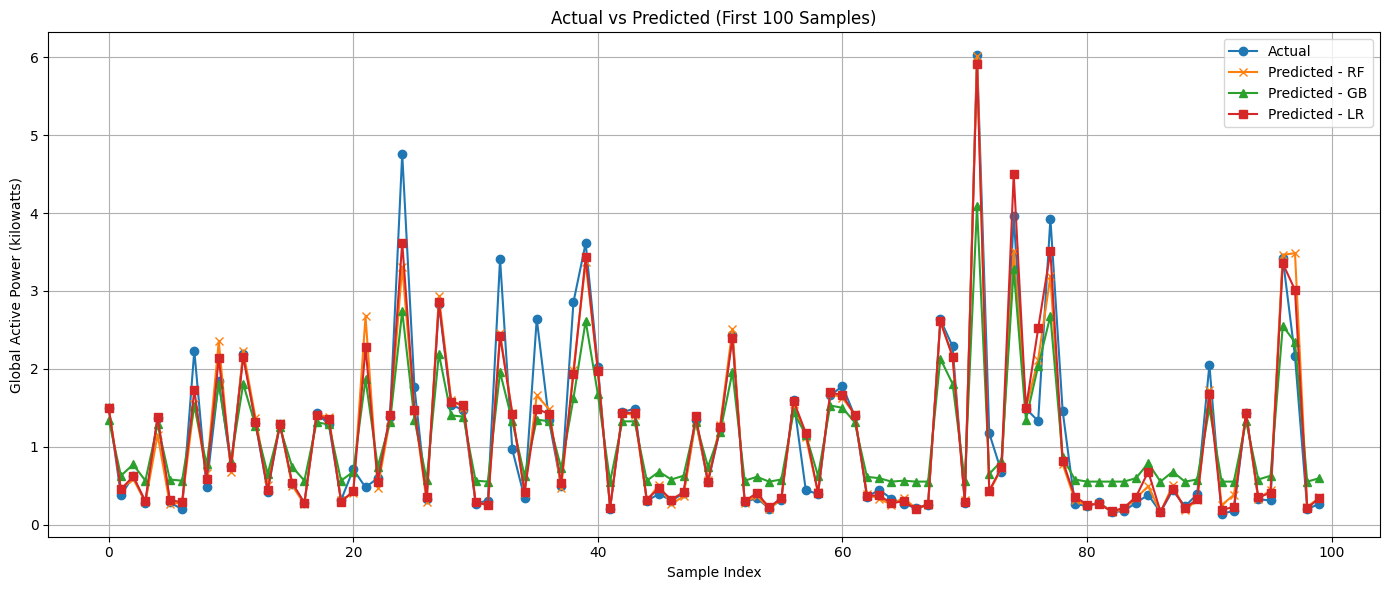

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted - RF', marker='x')
plt.plot(y_pred_gb[:100], label='Predicted - GB', marker='^')
plt.plot(y_pred[:100], label='Predicted - LR', marker='s')
plt.title('Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


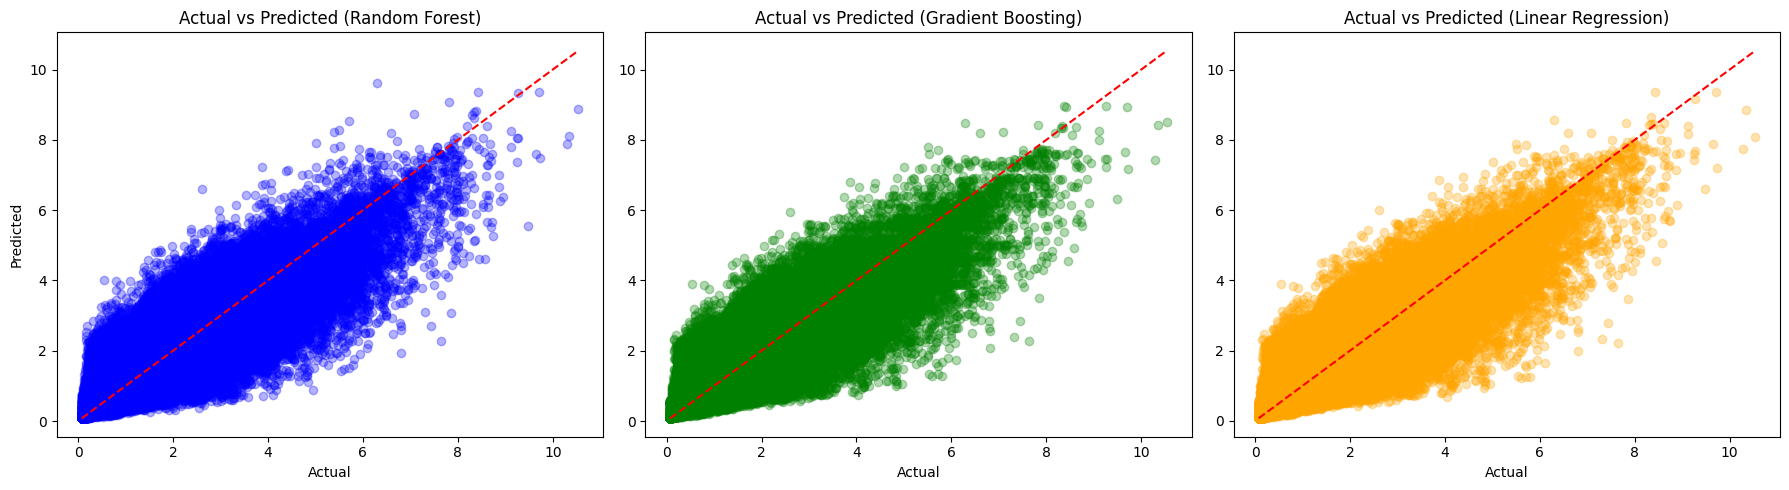

In [15]:
# 1. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. Train models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 3. Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# 4. Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Gradient Boosting
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Actual')

# Linear Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')

plt.tight_layout()
plt.show()


In [3]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42)
}

# Evaluate each model using R² score
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
    print(f"{name} - R² Scores: {scores}")
    print(f"{name} - Average R²: {np.mean(scores):.4f}\n")


Linear Regression - R² Scores: [0.90223238 0.90470263 0.90513492 0.8941999  0.8946576 ]
Linear Regression - Average R²: 0.9002

Random Forest - R² Scores: [0.87890707 0.88407671 0.88322656 0.87106676 0.86560657]
Random Forest - Average R²: 0.8766

Gradient Boosting - R² Scores: [0.77769169 0.78110668 0.78363591 0.78201227 0.78564756]
Gradient Boosting - Average R²: 0.7820



In [1]:
print("=" * 60)
print("🔍 Key Factors Influencing Household Energy Usage".center(60))
print("=" * 60)

key_factors = [
    "1. Household Size: Larger households tend to consume more energy due to increased usage of appliances and lighting.",
    "2. Number of Electrical Appliances: A higher number of appliances directly correlates with increased energy consumption.",
    "3. Income Level: Higher-income households often have more appliances and may prioritize comfort, leading to higher energy usage.",
    "4. Education Level: Educated households are more likely to adopt energy-efficient practices and technologies.",
    "5. Dwelling Characteristics: The type and size of the dwelling, as well as insulation quality, significantly impact energy consumption.",
    "6. Occupant Behavior: Daily routines, occupancy patterns, and awareness of energy conservation influence usage levels.",
    "7. Climate and Weather Conditions: External temperatures affect heating and cooling needs, thereby influencing energy consumption."
]

for factor in key_factors:
    print(f"🔸 {factor}")
print("\n")


      🔍 Key Factors Influencing Household Energy Usage      
🔸 1. Household Size: Larger households tend to consume more energy due to increased usage of appliances and lighting.
🔸 2. Number of Electrical Appliances: A higher number of appliances directly correlates with increased energy consumption.
🔸 3. Income Level: Higher-income households often have more appliances and may prioritize comfort, leading to higher energy usage.
🔸 4. Education Level: Educated households are more likely to adopt energy-efficient practices and technologies.
🔸 5. Dwelling Characteristics: The type and size of the dwelling, as well as insulation quality, significantly impact energy consumption.
🔸 6. Occupant Behavior: Daily routines, occupancy patterns, and awareness of energy conservation influence usage levels.
🔸 7. Climate and Weather Conditions: External temperatures affect heating and cooling needs, thereby influencing energy consumption.




In [2]:
print("=" * 60)
print("✅ Final Recommendations Based on Model Comparisons".center(60))
print("=" * 60)

recommendations = [
    "1. Model Selection: Proceed with Linear Regression for its accuracy and ease of interpretation.",
    "2. Feature Analysis: Conduct a detailed examination of feature coefficients to understand the impact of each variable on energy consumption.",
    "3. Policy Implications: Use insights on key influencing factors to inform energy conservation policies and targeted interventions.",
    "4. Future Work: Consider exploring ensemble methods or incorporating additional features to further enhance model performance."
]

for recommendation in recommendations:
    print(f"📌 {recommendation}")
print("\n")


     ✅ Final Recommendations Based on Model Comparisons     
📌 1. Model Selection: Proceed with Linear Regression for its accuracy and ease of interpretation.
📌 2. Feature Analysis: Conduct a detailed examination of feature coefficients to understand the impact of each variable on energy consumption.
📌 3. Policy Implications: Use insights on key influencing factors to inform energy conservation policies and targeted interventions.
📌 4. Future Work: Consider exploring ensemble methods or incorporating additional features to further enhance model performance.


